# Импорт данных и модулей

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn import preprocessing

from tensorflow import keras

from tensorflow.keras import layers, models, utils
from tensorflow.keras import layers, models, utils
from tensorflow.keras.utils import to_categorical, plot_model, model_to_dot
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.models import Sequential

from IPython.display import SVG

In [2]:
dataT = pd.read_csv('/content/drive/MyDrive/data/game_neural_network_train.csv',
                    names=['Health', 'knife', 'gun', 'enemies', 'Beh'])

dataTest = pd.read_csv('/content/drive/MyDrive/data/game_neural_network_test.csv',
                    names=['Health', 'knife', 'gun', 'enemies', 'Beh'])
dataT

,Health,knife,gun,enemies,Beh
0,2,0,0,0,dodge
1,2,0,0,1,dodge
2,2,0,1,1,attack
3,2,0,1,2,attack
4,2,1,0,2,hide
5,2,1,0,1,attack
6,1,0,0,0,dodge
7,1,0,0,1,hide
8,1,0,1,1,attack
9,1,0,1,2,hide


# Разделение тестовой и тренировочной выборок на матрицы признаков и вектора целевых признаков

In [3]:
dataTest

,Health,knife,gun,enemies,Beh
0,2,1,1,1,attack
1,1,1,1,2,hide
2,0,0,0,0,dodge
3,0,1,1,1,hide
4,2,0,1,3,hide
5,2,1,0,3,hide
6,0,1,0,3,run


In [4]:
X_train = dataT.iloc[:, 0:4]
X_train

,Health,knife,gun,enemies
0,2,0,0,0
1,2,0,0,1
2,2,0,1,1
3,2,0,1,2
4,2,1,0,2
5,2,1,0,1
6,1,0,0,0
7,1,0,0,1
8,1,0,1,1
9,1,0,1,2


In [5]:
X_test = dataTest.iloc[:, 0:4]
X_test

,Health,knife,gun,enemies
0,2,1,1,1
1,1,1,1,2
2,0,0,0,0
3,0,1,1,1
4,2,0,1,3
5,2,1,0,3
6,0,1,0,3


In [6]:
y_train = dataT.select_dtypes(include=[object])
y_train

,Beh
0,dodge
1,dodge
2,attack
3,attack
4,hide
5,attack
6,dodge
7,hide
8,attack
9,hide


In [7]:
y_test = dataTest.select_dtypes(include=[object])
y_test

,Beh
0,attack
1,hide
2,dodge
3,hide
4,hide
5,hide
6,run


In [8]:
y_train.Beh.unique()

array(['dodge', 'attack', 'hide', 'run'], dtype=object)

# Преобразование данных

## Нормализация целевого признака

In [9]:
le = preprocessing.LabelEncoder()

train_labels2 = y_train.apply(le.fit_transform)

test_labels2 = y_test.apply(le.fit_transform)

In [10]:
train_labels2

,Beh
0,1
1,1
2,0
3,0
4,2
5,0
6,1
7,2
8,0
9,2


In [11]:
test_labels2

,Beh
0,0
1,2
2,1
3,2
4,2
5,2
6,3


In [12]:
train_labels = to_categorical(train_labels2)
test_labels = to_categorical(test_labels2)
train_labels

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]], dtype=float32)

In [13]:
test_labels

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)

# Построение модели нейронной сети

## Описание модели

In [14]:
model = Sequential()

model.add(layers.Dense(3, activation='relu', input_shape=(4,)))
model.add(layers.Dense(4, activation='softmax'))

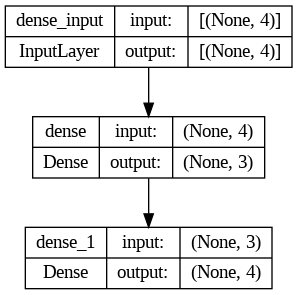

In [15]:
plot_model(model, to_file='model.png', show_shapes=True)

## Общая информация

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 15        
                                                                 
 dense_1 (Dense)             (None, 4)                 16        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Визуализация модели

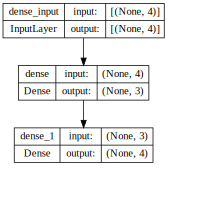

In [17]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

## Компиляция модели

In [18]:
opt = SGD(learning_rate=0.01, momentum=0.9)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

## Обучение модели

In [19]:
history = model.fit(X_train, train_labels, validation_data=(X_test, test_labels), epochs=500, batch_size=1)

Epoch 1/500
18/18 [==============================] - 2s 45ms/step - loss: 1.3863 - accuracy: 0.3889 - val_loss: 1.1426 - val_accuracy: 0.8571
Epoch 2/500
18/18 [==============================] - 0s 8ms/step - loss: 1.2644 - accuracy: 0.3889 - val_loss: 1.1645 - val_accuracy: 0.5714
Epoch 3/500
18/18 [==============================] - 0s 6ms/step - loss: 1.1842 - accuracy: 0.5556 - val_loss: 1.0362 - val_accuracy: 0.7143
Epoch 4/500
18/18 [==============================] - 0s 7ms/step - loss: 1.0093 - accuracy: 0.6667 - val_loss: 0.8645 - val_accuracy: 0.7143
Epoch 5/500
18/18 [==============================] - 0s 6ms/step - loss: 1.1002 - accuracy: 0.5000 - val_loss: 0.9143 - val_accuracy: 0.8571
Epoch 6/500
18/18 [==============================] - 0s 6ms/step - loss: 0.9626 - accuracy: 0.7222 - val_loss: 0.8007 - val_accuracy: 0.8571
Epoch 7/500
18/18 [==============================] - 0s 7ms/step - loss: 0.8547 - accuracy: 0.6667 - val_loss: 0.6803 - val_accuracy: 0.8571
Epoch 8/500


# Визуализация процесса обучения

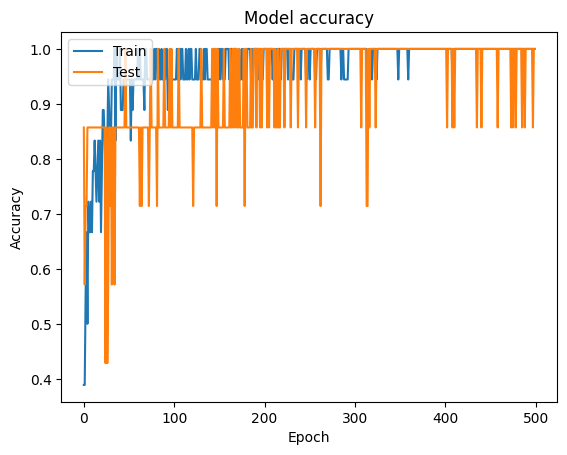

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

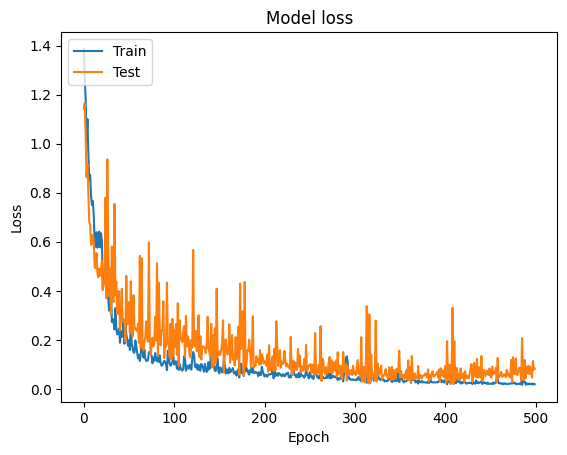

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Работа модели

In [29]:
y_new = np.argmax(model.predict(X_test), axis=1)

print("Predicted:", y_new)
print("Actual:   ",test_labels2.Beh.values)

1/1 [==============================] - 0s 36ms/step
Predicted: [0 2 1 2 2 2 3]
Actual:    [0 2 1 2 2 2 3]
